In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import KNNImputer
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/locations-dhaka-rent4/locations.json
/kaggle/input/house-price-bangladesh/house_price_bd.csv


In [2]:
data = pd.read_csv("/kaggle/input/house-price-bangladesh/house_price_bd.csv")
data.head(5)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [3]:
data.shape

(3865, 9)

In [4]:
data.describe()

,Bedrooms,Bathrooms,Floor_area
count,2864.000000,2864.000000,3766.000000
mean,3.133031,2.992668,1940.299522
std,2.215457,0.978434,6024.921935
min,1.000000,1.000000,84.000000
25%,3.000000,3.000000,1100.000000
50%,3.000000,3.000000,1380.000000
75%,3.000000,3.000000,1860.000000
max,50.000000,10.000000,195840.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [6]:
data.dtypes

Title                object
Bedrooms            float64
Bathrooms           float64
Floor_no             object
Occupancy_status     object
Floor_area          float64
City                 object
Price_in_taka        object
Location             object
dtype: object

In [7]:
data.isna().sum()

Title                  0
Bedrooms            1001
Bathrooms           1001
Floor_no             684
Occupancy_status      99
Floor_area            99
City                   0
Price_in_taka          0
Location               6
dtype: int64

In [8]:
# check duplicates
data.duplicated().sum()

934

In [9]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

In [10]:
# check again
data.duplicated().sum()

0

In [11]:
# Columns of interest
columns_of_interest = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Occupancy_status']

# Extract and analyze specific columns
for col in columns_of_interest:
    if col in data.columns:
        unique_values = data[col].unique()
        print(f"Column '{col}' unique values: {unique_values}")

Column 'Bedrooms' unique values: [ 3.  4.  2. nan 16.  8.  5.  1.  6. 18. 46.  7. 13. 33. 50. 23. 21. 22.
 20. 27. 15.]
Column 'Bathrooms' unique values: [ 4.  3.  2. nan  5. 10.  1.  6.  8.]
Column 'Floor_no' unique values: ['3' '1' '6' '4' '8' '2' '5' '7' '9' '8th' nan '10' '14' 'G+7' '13' '12'
 '1st' '11' 'A1,A2,A3,A4,A5,A6,A7' '0+7' '1F' '4th to 8th Backside' '18'
 '5th' '17' 'Merin City - Purbach']
Column 'Occupancy_status' unique values: ['vacant' 'occupied' nan]


In [12]:
data['Price_in_taka'] = data['Price_in_taka'].str.replace(',', '').str.replace('৳', '').astype("int64")

In [13]:
data['Price_in_taka'] = data['Price_in_taka'] / 1_000_000

In [14]:
data.rename(columns={'Price_in_taka': 'Price_in_taka(M)'}, inplace=True)

In [15]:
data.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,39.0,"Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,16.9,"Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,12.5,"Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,20.0,"Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,47.5,"Road No 25, Banani"


In [16]:
data['Floor_no'].unique()

array(['3', '1', '6', '4', '8', '2', '5', '7', '9', '8th', nan, '10',
       '14', 'G+7', '13', '12', '1st', '11', 'A1,A2,A3,A4,A5,A6,A7',
       '0+7', '1F', '4th to 8th Backside', '18', '5th', '17',
       'Merin City - Purbach'], dtype=object)

In [17]:
data[data['Floor_no'] == 'Merin City - Purbach']

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
3313,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"
3388,"For Sale, Residential Plot Is Situated In Bpro...",NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"
3392,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"
3393,Plot For Sale In A Suitable Place In Bproperty...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"
3432,In The Beautiful Location Of Bproperty Village...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"
3492,Plot For Sale In A Suitable Place In Narayanga...,NaN,NaN,Merin City - Purbach,vacant,2160.0,narayanganj-city,4.575,"Rupganj, Narayanganj"


In [18]:
data[data['Floor_no'] == 'A1,A2,A3,A4,A5,A6,A7']

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
1663,A Full Building Is For Sale In Sugandha Reside...,18.0,10.0,"A1,A2,A3,A4,A5,A6,A7",vacant,10890.0,chattogram,105.0,"Sugandha Residential Area, Panchlaish"


In [19]:
data[data['Floor_no'] == '4th to 8th Backside']

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
2674,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4th to 8th Backside,vacant,1250.0,chattogram,3.8,"Dakshin Kattali, 11 No. South Kattali Ward"


In [20]:
print(data.shape)

(2931, 9)


In [21]:
# Step 1: Fix `Floor_no` values
def clean_floor_no(value):
    if pd.isna(value):
        return value
    value = str(value).strip().lower()
    if value.endswith('th') or value.endswith('st') or value.endswith('f'):
        return int(''.join(filter(str.isdigit, value)))
    if value == 'g+7' or value == '0+7':
        return 7
    if value == 'a1,a2,a3,a4,a5,a6,a7':
        return 'A1-A7'  # Placeholder for later row expansion
    if value == '4th to 8th backside':
        return '4-8'  # Placeholder for later row expansion
    if value == 'Merin City - Purbach':
        return np.nan
    return value

data['Floor_no'] = data['Floor_no'].apply(clean_floor_no)


In [22]:
# Step 2: Expand rows for specific cases
# Case: 'A1,A2,A3,A4,A5,A6,A7'
a1_a7_data = data[data['Floor_no'] == 'A1-A7'].copy()
a1_a7_expanded = pd.DataFrame()

for i in range(1, 8):
    temp = a1_a7_data.copy()
    temp['Floor_no'] = i
    a1_a7_expanded = pd.concat([a1_a7_expanded, temp], ignore_index=True)

In [23]:
# Case: '4th to 8th Backside'
four_to_eight_data = data[data['Floor_no'] == '4-8'].copy()
four_to_eight_expanded = pd.DataFrame()

for i in range(4, 9):
    temp = four_to_eight_data.copy()
    temp['Floor_no'] = i
    four_to_eight_expanded = pd.concat([four_to_eight_expanded, temp], ignore_index=True)

In [24]:
# Remove rows with placeholders and add expanded rows
data = data[~data['Floor_no'].isin(['A1-A7', '4-8'])]
data = pd.concat([data, a1_a7_expanded, four_to_eight_expanded], ignore_index=True)

# Convert `Floor_no` to numeric
data['Floor_no'] = pd.to_numeric(data['Floor_no'], errors='coerce')

In [25]:
data.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,39.0,"Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1.0,vacant,1705.0,dhaka,16.9,"Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6.0,vacant,1370.0,dhaka,12.5,"Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4.0,vacant,2125.0,dhaka,20.0,"Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4.0,vacant,2687.0,dhaka,47.5,"Road No 25, Banani"


In [26]:
data.shape

(2941, 9)

In [27]:
data[data['Location']=='Dakshin Kattali, 11 No. South Kattali Ward'].head(5)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location
1243,"Start Your New Home, In This Reasonable And Co...",4.0,3.0,5.0,vacant,1500.0,chattogram,6.0,"Dakshin Kattali, 11 No. South Kattali Ward"
1258,Visit This 825 Sq Ft Flat For Sale In Dakshin ...,3.0,3.0,3.0,vacant,825.0,chattogram,3.7,"Dakshin Kattali, 11 No. South Kattali Ward"
1981,1200 Sq Ft Flat With Great Residential Service...,3.0,3.0,4.0,vacant,1200.0,chattogram,8.0,"Dakshin Kattali, 11 No. South Kattali Ward"
2936,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,4.0,vacant,1250.0,chattogram,3.8,"Dakshin Kattali, 11 No. South Kattali Ward"
2937,An Apartment Is Up For Sale In Dakshin Kattali...,3.0,3.0,5.0,vacant,1250.0,chattogram,3.8,"Dakshin Kattali, 11 No. South Kattali Ward"


In [28]:
data['Floor_no'].unique()

array([ 3.,  1.,  6.,  4.,  8.,  2.,  5.,  7.,  9., nan, 10., 14., 13.,
       12., 11., 18., 17.])

In [29]:
data.isna().sum()

Title                 0
Bedrooms            831
Bathrooms           831
Floor_no            581
Occupancy_status     89
Floor_area           89
City                  0
Price_in_taka(M)      0
Location              6
dtype: int64

In [30]:
# unique values of "City"
data["City"].unique()

array(['dhaka', 'chattogram', 'cumilla', 'narayanganj-city', 'gazipur'],
      dtype=object)

In [31]:
columns_to_drop_miising_values = ['Occupancy_status', 'Floor_area', 'Location', 'Floor_no']

# Remove rows with missing values in the specified columns
data = data.dropna(subset=columns_to_drop_miising_values, axis = 0)
# verify the result
print(data.isnull().sum())

Title                 0
Bedrooms            270
Bathrooms           270
Floor_no              0
Occupancy_status      0
Floor_area            0
City                  0
Price_in_taka(M)      0
Location              0
dtype: int64


In [32]:
# Impute the missing values in Bathrooms and Bedrooms using Floor area
features = ['Floor_area', 'Bedrooms', 'Bathrooms']

imputer = KNNImputer(n_neighbors=5, weights='distance')
data[features] = imputer.fit_transform(data[features])

In [33]:
data.isna().sum()

Title               0
Bedrooms            0
Bathrooms           0
Floor_no            0
Occupancy_status    0
Floor_area          0
City                0
Price_in_taka(M)    0
Location            0
dtype: int64

In [34]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        print(f"Top 5 largest values in '{col}':")
        print(data[col].nlargest(5))

Top 5 largest values in 'Bedrooms':
217     46.000000
99      27.803983
2250    27.000000
1625    22.000000
1457    21.000000
Name: Bedrooms, dtype: float64
Top 5 largest values in 'Bathrooms':
2047    10.0
206     10.0
217     10.0
986     10.0
999     10.0
Name: Bathrooms, dtype: float64
Top 5 largest values in 'Floor_no':
2110    18.0
2161    17.0
198     14.0
1560    14.0
230     13.0
Name: Floor_no, dtype: float64
Top 5 largest values in 'Floor_area':
1489    24000.0
99      21500.0
217     19200.0
40      16000.0
510     15120.0
Name: Floor_area, dtype: float64
Top 5 largest values in 'Price_in_taka(M)':
1602    363.2
1910    363.2
2023    363.2
1245    350.0
2128    350.0
Name: Price_in_taka(M), dtype: float64


In [35]:
for col in data.columns:
    print(data[col].value_counts().head(5))

Title
A Full Building Is For Sale In Sugandha Residential Area, Panchlaish.           7
An Apartment Is Up For Sale In Dakshin Kattali, Near Anandomoyee Kali Temple    5
Buy This 240 Sq Ft Shop At Bakalia                                              2
1445 Sq Ft Residential Apartment Is Available For Sale In Chotora, Cumilla      2
Visit This Apartment For Sale In Bakalia Near Haji Eqbal Jame Masjid            1
Name: count, dtype: int64
Bedrooms
3.000000    1622
2.000000     294
4.000000     167
1.316456      16
1.227586      15
Name: count, dtype: int64
Bathrooms
3.0     1320
2.0      465
4.0      235
5.0       55
10.0      18
Name: count, dtype: int64
Floor_no
1.0    382
4.0    308
5.0    296
2.0    275
3.0    262
Name: count, dtype: int64
Occupancy_status
vacant      2357
occupied       2
Name: count, dtype: int64
Floor_area
1300.0    69
1500.0    68
1250.0    62
1200.0    59
1400.0    56
Name: count, dtype: int64
City
chattogram          1077
dhaka               1006
gazipur      

In [36]:
data['City'].value_counts()

City
chattogram          1077
dhaka               1006
gazipur              141
cumilla              130
narayanganj-city       5
Name: count, dtype: int64

In [37]:
data['Avg Unit Price'] = round((data['Price_in_taka(M)'] * 1_000_000)/ data['Floor_area'],1)
data.head(2)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka(M),Location,Avg Unit Price
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3.0,vacant,1960.0,dhaka,39.0,"Gulshan 1, Gulshan",19898.0
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1.0,vacant,1705.0,dhaka,16.9,"Lake Circus Road, Kalabagan",9912.0


In [38]:
averages_l = data.groupby(['Location', 'City']).mean(numeric_only=True).reset_index()
result = averages_l[['Location', 'City', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka(M)', 'Avg Unit Price']]
result.sort_values(by='Avg Unit Price', ascending=False).head(5)


,Location,City,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka(M),Avg Unit Price
109,"CDA Avenue, 15 No. Bagmoniram Ward",chattogram,1.268284,1.171127,2.000000,181.0,9.50,52486.200000
268,"Motijheel Road, Motijheel",dhaka,4.201357,4.583595,1.000000,4686.0,210.87,45000.000000
212,"Kazi Nazrul Islam Avenue, Banglamotors",dhaka,4.000000,5.000000,1.000000,3000.0,120.00,40000.000000
153,"East Nasirabad, Muradpur",chattogram,1.875179,2.133416,4.333333,610.0,10.00,38117.566667
285,"New Eskaton Road, Eskaton",dhaka,3.914478,4.768314,2.500000,2922.5,100.75,34477.950000


In [39]:
averages_c = data.groupby(['City']).mean(numeric_only=True).reset_index()
result = averages_c[['City', 'Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area', 'Price_in_taka(M)', 'Avg Unit Price']]
result.sort_values(by='Avg Unit Price', ascending=False).head(5)


,City,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka(M),Avg Unit Price
0,chattogram,3.042922,2.938700,4.290622,1531.617456,11.846612,9326.775487
2,dhaka,3.087115,2.928728,4.335984,1519.217694,12.841515,7500.591948
3,gazipur,2.733310,2.523693,5.964539,1096.886525,5.652746,6995.765248
4,narayanganj-city,2.800000,2.400000,5.800000,1197.200000,6.560000,5621.780000
1,cumilla,2.856923,2.770769,7.100000,1298.715385,5.325068,4123.430000


In [40]:
print(data['Bathrooms'].unique())
print(data['Bedrooms'].unique())

[ 4.          3.          2.          4.11632383  9.15644771  5.
  2.8         3.60869565  9.75007977  3.90540541  1.          4.4
  6.         10.          4.90312745  1.11031612  3.6         8.
  4.53662751  1.2180531   4.15516419  6.81012472  3.66666667  4.90094692
  4.6229747   4.24625099  4.61872238  1.13192555  2.2         1.04315527
  1.0679233   4.58359485  1.14482759  1.047132    1.21443695  2.5
  1.20253165  1.22801468  1.2442338   1.19634785  7.10153087  6.03917458
  1.23401226  1.23107221  1.19725874  9.68355074  1.22151441  1.22483169
  1.10671642  1.21875738  1.18461362  4.96376125  5.34979493  4.09568904
  1.17112658  3.5         1.24063129  1.21218798  1.20669052  4.50020773
  1.22218906  1.17232877  1.19905239  1.17811705  3.2         3.25
  1.24523089  1.19449706  1.48929483  9.69249639  1.2058749   1.22612049
  1.19067439  1.19260641  1.22352141  5.25246509  1.15955679  1.19164567
  3.          1.23684211  1.11892115  1.2136941   1.23956839  1.24219719
  1.16742473  

In [41]:
# Round the 'Bedrooms' values to the nearest integer
data['Bedrooms'] = data['Bedrooms'].round().astype(int)
data['Bathrooms'] = data['Bathrooms'].round().astype(int)

In [42]:
location_data = pd.read_json('/kaggle/input/locations-dhaka-rent4/locations.json')

In [43]:
location_data.head()

,"Gulshan 1, Gulshan","Lake Circus Road, Kalabagan","Shukrabad, Dhanmondi","Block L, Bashundhara R-A","Road No 25, Banani","Middle Badda, Badda","Block B, Bashundhara R-A","Block D, Bashundhara R-A","Matuail, Demra","Block H, Aftab Nagar",...,"Talpokur Par, Bagichagaon","North Race Course, Race Course","Mizmizi, Shiddhirganj","Tongi, Gazipur Sadar Upazila","Joydebpur, Gazipur Sadar Upazila","Shimultoly, Gazipur Sadar Upazila","Chandana, Gazipur Sadar Upazila","Chowrasta, Chandra","aziz Moholla, Mohammadpur","Sobur khan Road, Dakshin Khan"
latitude,23.780887,23.746466,23.746466,23.8151,23.7930,23.780546,23.8151,23.8151,23.720881,23.7638,...,23.4615,23.463,23.7745,23.870,23.8275,23.8375,23.8345,23.8115,23.76779,23.873548
longitude,90.416640,90.376015,90.376015,90.4285,90.4043,90.426659,90.4285,90.4285,90.483269,90.4285,...,91.1835,91.187,90.7325,90.403,90.3810,90.3845,90.3650,90.3560,90.36150,90.407661


In [44]:
data['latitude'] = data['Location'].map(lambda loc: location_data.get(loc, {}).get('latitude'))
data['longitude'] = data['Location'].map(lambda loc: location_data.get(loc, {}).get('longitude'))

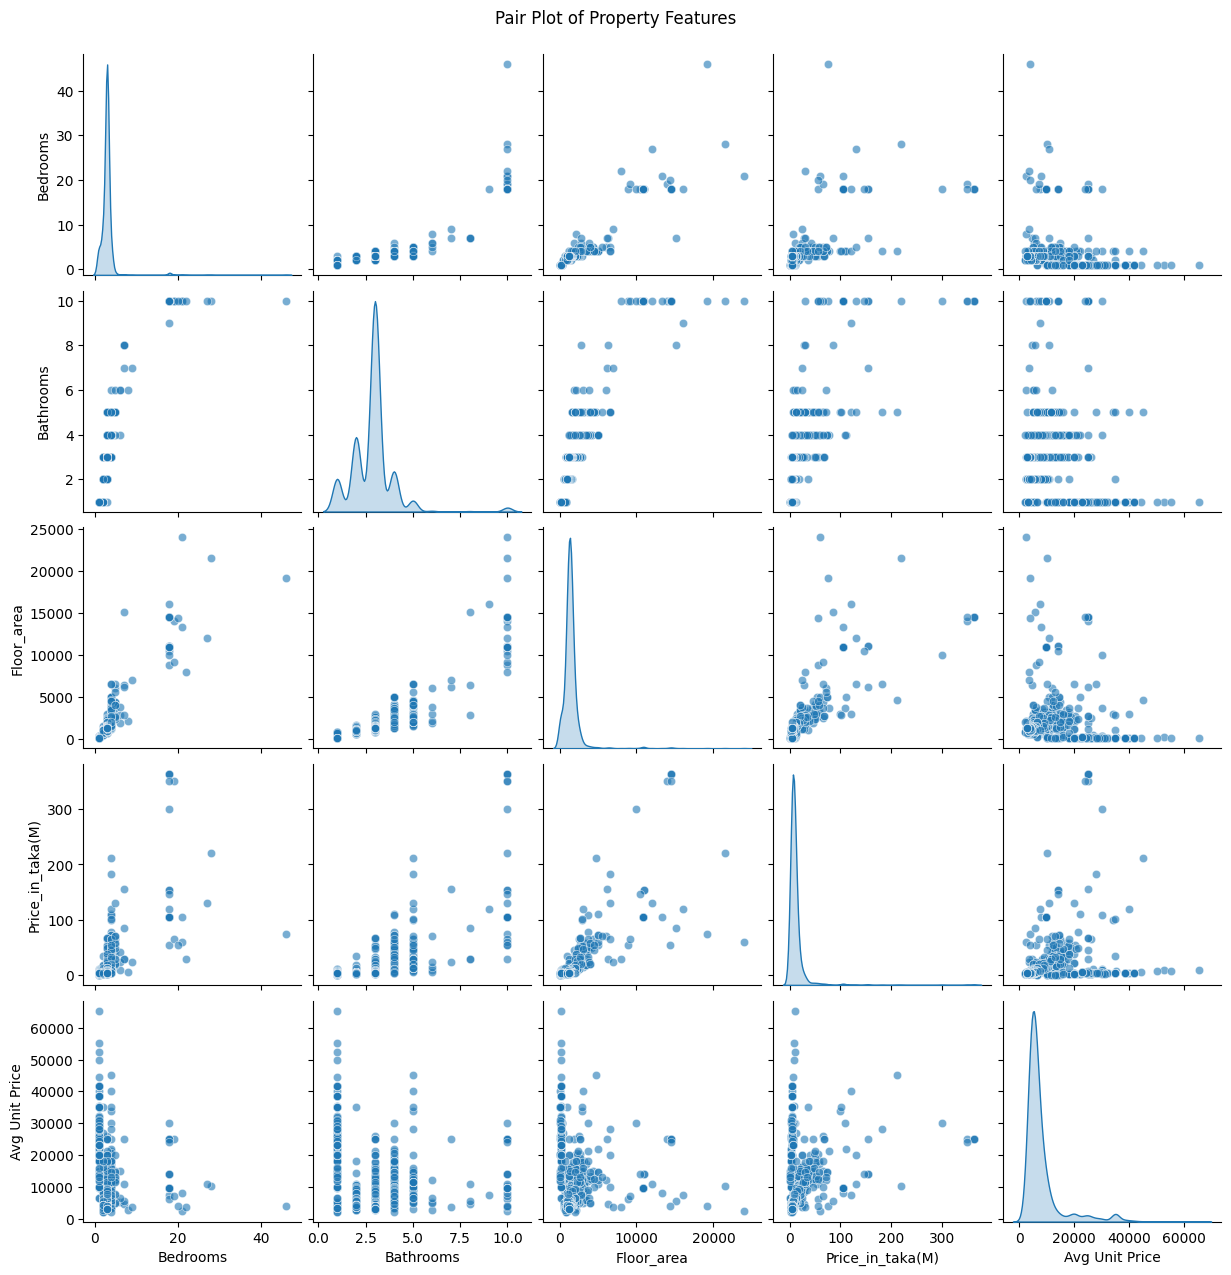

In [45]:
# Select numeric columns for the pair plot
numeric_cols = ['Bedrooms', 'Bathrooms', 'Floor_area', 'Price_in_taka(M)', 'Avg Unit Price']

# Create the pair plot
sns.pairplot(data[numeric_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.6})

# Set the title of the pair plot
plt.suptitle('Pair Plot of Property Features', y=1.02)

# Show the plot
plt.show()

In [46]:
fig = px.scatter_mapbox(data[data['City']=='chattogram'], 
                         lat='latitude', 
                         lon='longitude', 
                         text='Location',  # Label for the points
                         zoom=7, 
                         height=700,
                         color_discrete_sequence=['red'])

# Update the layout for Mapbox
fig.update_traces(marker=dict(size=9))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Addresses in Chattogram(Bangladesh)')

# Show the map
fig.show()

In [47]:
fig = px.scatter_mapbox(data[data['City']!='chattogram'], 
                         lat='latitude', 
                         lon='longitude', 
                         text='Location',  # Label for the points
                         zoom=7, 
                         height=700,
                         color_discrete_sequence=['red'])

# Update the layout for Mapbox
fig.update_traces(marker=dict(size=9))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Addresses in Dhaka and Cumilla(Bangladesh)')

# Show the map
fig.show()

In [48]:
# Calculate the correlation between Floor_area and Price_in_taka(M)
correlation = np.corrcoef(data['Floor_area'], data['Price_in_taka(M)'])[0, 1]

# Create scatter plot
fig2 = px.scatter(data, x='Floor_area', y='Price_in_taka(M)', 
                  color='Bedrooms', size='Bathrooms',
                  hover_data=['Location', 'City'],
                  title=f'Price vs Floor Area (Correlation: {correlation:.2f})',
                  labels={'Floor_area': 'Floor Area', 
                          'Price_in_taka(M)': 'Price (Million Taka)'})

# Update layout to position the legend at the top-right corner
fig2.update_layout(
    legend=dict(
        x=1.05,  # Move legend outside the plot
        y=1,  # Align it to the top
        traceorder='normal',
        orientation='v',
        title='Number of Bedrooms'
    )
)

# Show the plot
fig2.show()

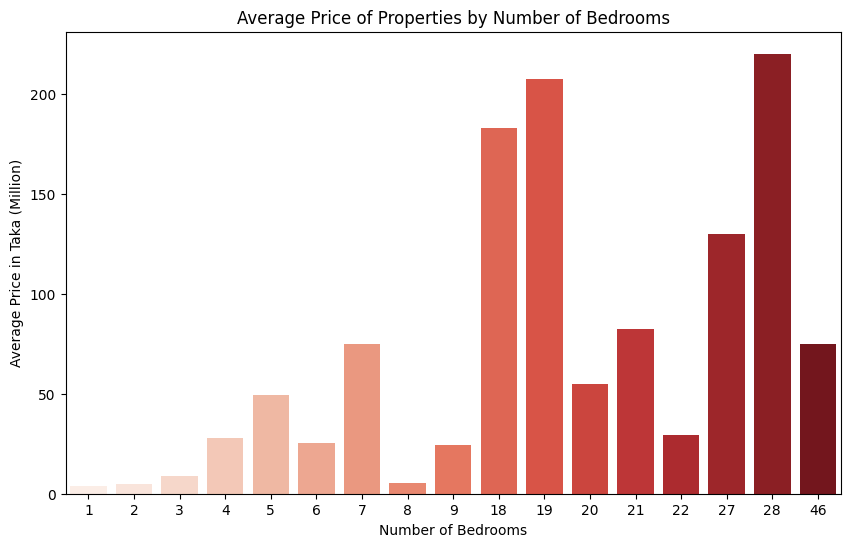

In [49]:
avg_price_by_bedrooms = data.groupby('Bedrooms')['Price_in_taka(M)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Bedrooms', y='Price_in_taka(M)', data=avg_price_by_bedrooms, palette='Reds')
plt.title('Average Price of Properties by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price in Taka (Million)')

plt.show()

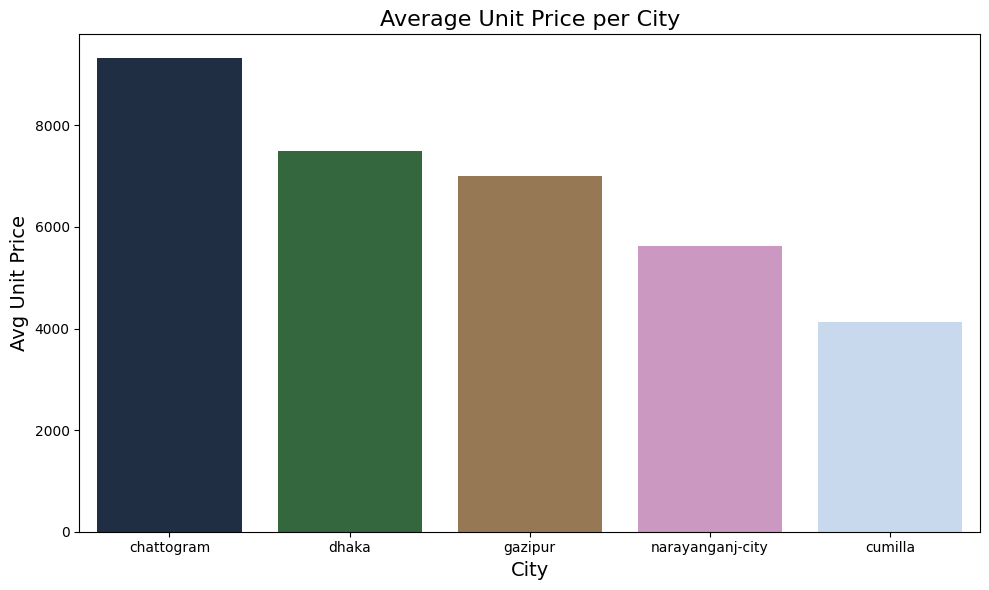

In [50]:
avg_price_per_city = data.groupby('City')['Avg Unit Price'].mean().reset_index()
avg_price_per_city = avg_price_per_city.sort_values(by='Avg Unit Price', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_city, x='City', y='Avg Unit Price', palette='cubehelix')
plt.title('Average Unit Price per City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Avg Unit Price', fontsize=14)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:


# Create 3D scatter plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=data['Floor_area'],
        y=data['Floor_no'],
        z=data['Price_in_taka(M)'],
        mode='markers',
        marker=dict(
            size=5,
            color=data['Price_in_taka(M)'],  # Color by price
            colorscale='Viridis',  # Color scale
            opacity=0.8
        )
    )
])

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis_title='Floor Area',
        yaxis_title='Floor Number',
        zaxis_title='Price in Taka (M)',
    ),
    title="3D Scatter Plot of Price vs. Floor Area and Floor Number",
    width=800,
    height=700
)

# Show the plot
fig.show()


In [52]:
# Grouping data to calculate the median price for each combination of Bedrooms and Bathrooms
median_prices = data.groupby(['Bedrooms', 'Bathrooms'])['Price_in_taka(M)'].median().reset_index()

# Create bar chart
fig = px.bar(
    median_prices,
    x='Bedrooms',
    y='Price_in_taka(M)',
    color='Bathrooms',
    color_continuous_scale='Blues',
    barmode='group',
    title='Median Property Prices by Number of Bedrooms and Bathrooms',
    labels={
        'Price_in_taka(M)': 'Median Price (Taka in Millions)',
        'Bedrooms': 'Number of Bedrooms',
        'Bathrooms': 'Number of Bathrooms'
    }
)

# Customize layout for better readability
fig.update_layout(
    xaxis_title='Number of Bedrooms',
    yaxis_title='Median Price (Taka in Millions)',
    legend_title='Number of Bathrooms',
    width=900,
    height=600
)

# Show the plot
fig.show()

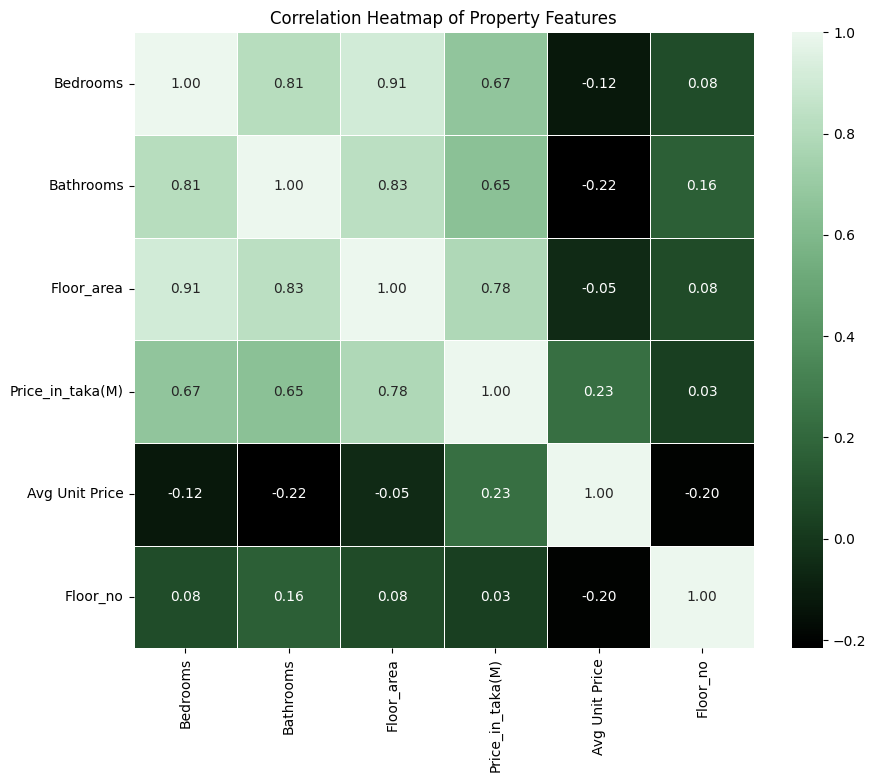

In [53]:
# Select numeric columns
numeric_cols = ['Bedrooms', 'Bathrooms', 'Floor_area', 'Price_in_taka(M)', 'Avg Unit Price', 'Floor_no']

# Calculate correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the cubehelix palette
cubehelix = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

# Generate the heatmap with the cubehelix color palette
sns.heatmap(correlation_matrix, annot=True, cmap=cubehelix, fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Property Features')

# Show the plot
plt.show()